# Implementacja

### Importowanie bibliotek i własnego generatora

In [58]:

# from custom_random import rand
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

from generator import Generator

### Zmienne Stałe, Globalne

#### Parametry sygnału i zakres

In [59]:

CZAS_TRWANIA = 10  # sekundy
CZESTOTLIWOSC_PROBKOWANIA = 10000  # Hz

ZAKRES = (5, 10) # Liczby rzeczywiste

#### Obliczanie czasu trawania i generowanie szumu białego

In [60]:

LICZBA_PROBEK = CZAS_TRWANIA * CZESTOTLIWOSC_PROBKOWANIA
print(f"Liczba próbek {LICZBA_PROBEK}")

#Stwórz obiket Generator
gen = Generator()
szum_bialy = gen.uniform(ZAKRES[0], ZAKRES[1], LICZBA_PROBEK)

# Gotowy generator
#szum_bialy = np.random.uniform(ZAKRES[0], ZAKRES[1], LICZBA_PROBEK)

Liczba próbek 100000


### Wykresy

#### Wykres czasowy szumu białego o rozkładzie równomiernym

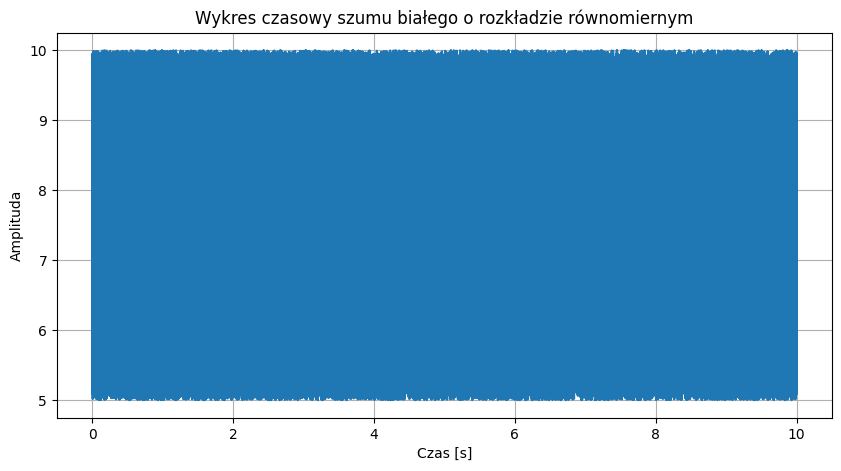

In [61]:

czas = np.linspace(0, CZAS_TRWANIA, LICZBA_PROBEK)
plt.figure(figsize=(10, 5))
plt.plot(czas, szum_bialy)
plt.title('Wykres czasowy szumu białego o rozkładzie równomiernym')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

### Przybliżony wykres czasowy szumu białego

Liczba próbek 100


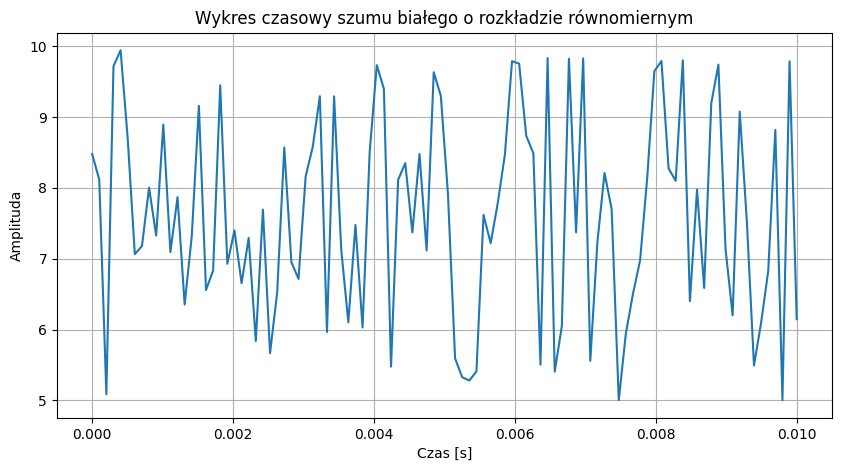

In [62]:

MALY_CZAS_TRWANIA = 0.01
MALA_LICZBA_PROBEK = int(MALY_CZAS_TRWANIA * CZESTOTLIWOSC_PROBKOWANIA)
print(f"Liczba próbek {MALA_LICZBA_PROBEK}")

maly_szum = gen.uniform(ZAKRES[0], ZAKRES[1], MALA_LICZBA_PROBEK)

maly_czas = np.linspace(0, MALY_CZAS_TRWANIA, MALA_LICZBA_PROBEK)
plt.figure(figsize=(10, 5))
plt.plot(maly_czas, maly_szum)
plt.title('Wykres czasowy szumu białego o rozkładzie równomiernym')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

### Histogram

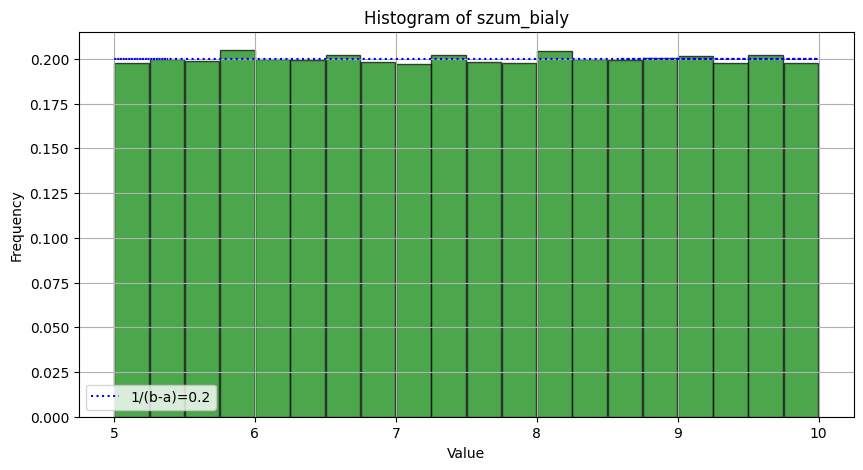

In [63]:
plt.figure(figsize=(10, 5))

x = np.linspace(ZAKRES[0], ZAKRES[1], 100)
plt.plot(szum_bialy, uniform.pdf(szum_bialy, loc=ZAKRES[0], scale=ZAKRES[1]-ZAKRES[0]), 'b', linestyle='dotted', label=f'1/(b-a)={1/(ZAKRES[1]-ZAKRES[0])}')


plt.hist(szum_bialy, bins=20, density=True, rwidth=0.98, color='g', edgecolor='black', alpha=0.7)
plt.title('Histogram of szum_bialy')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


### Gęstość prawdopodobieństwa

In [64]:
#x = np.linspace(ZAKRES[0], ZAKRES[1], 100)
#plt.plot(szum_bialy, uniform.pdf(szum_bialy, loc=ZAKRES[0], scale=ZAKRES[1]-ZAKRES[0]), 'b', label='1/(b-a)')
# Dodanie linii przerywanych na początku i końcu
#plt.vlines(ZAKRES[0], 0, uniform.pdf(ZAKRES[0], loc=ZAKRES[0], scale=ZAKRES[1] - ZAKRES[0]), colors='gray', linestyles='dashed')
#plt.vlines(ZAKRES[1], 0, uniform.pdf(ZAKRES[1], loc=ZAKRES[0], scale=ZAKRES[1] - ZAKRES[0]), colors='gray', linestyles='dashed')

#plt.legend()
#plt.grid(True)
#plt.show()

### Obliczanie dystrybuanty


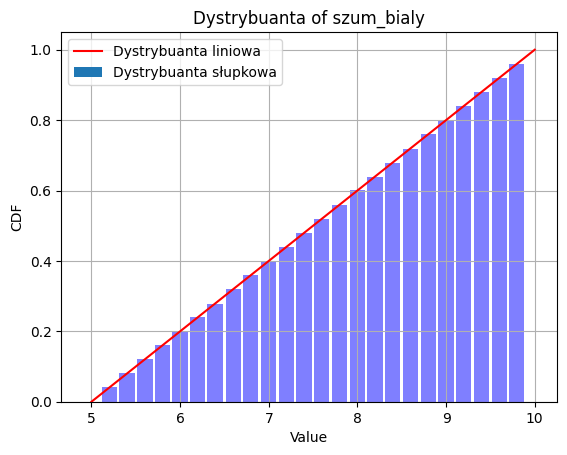

In [65]:
def wykresy_dystrybuanty(szum_bialy, liczba_slupkow=10, szerokosc_slupka=0.90):
    '''
    Funkcja generuje wykresy dystrybuanty dla szumu białego.
    :param szum_bialy: wygenerowany wcześniej szum biały
    :param liczba_slupkow: liczba słupków, domyślnie 10
    :param szerokosc_slupka: szerokość słupka, w przedziale 0.0 - 1.0 (domyślnie 0.9)
    :return: brak
    '''
    
    # Obliczanie dystrybuanty
    cdf_values = uniform.cdf(szum_bialy, loc=ZAKRES[0], scale=ZAKRES[1] - ZAKRES[0])
    
    # Obliczanie kroku dla słupków X
    ilosc_probek = len(szum_bialy)
    krok = int(ilosc_probek / liczba_slupkow)
 
    # Sortowanie danych
    sorted_data = np.sort(szum_bialy)
    sorted_cdf = np.sort(cdf_values)
    
    # Obliczanie szerokości słupków
    width = (sorted_data[krok] - sorted_data[0]) * szerokosc_slupka  # 80% szerokości między pierwszym a drugim słupkiem
 
    # Tworzenie wykresu słupkowego dystrybuanty
    for i in range(0, LICZBA_PROBEK, krok):
        plt.bar(sorted_data[i], sorted_cdf[i], width=width, color='b', alpha=0.5)
        
    # Dodanie labela dla wszystkich słupków
    plt.bar([], [], color='b', alpha=0.5, label='Dystrybuanta słupkowa')
 
    # Tworzenie wykresu liniowego dla dystrybuanty
    plt.plot(sorted_data, sorted_cdf, 'r', label='Dystrybuanta liniowa')
    
    plt.title('Dystrybuanta of szum_bialy')
    plt.xlabel('Value')
    plt.ylabel('CDF')
    plt.legend()
    plt.grid(True)
    plt.show()

wykresy_dystrybuanty(szum_bialy=szum_bialy, liczba_slupkow=25, szerokosc_slupka=0.85)